<a href="https://colab.research.google.com/github/rohith033/Catclassifier/blob/main/Resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai duckduckgo_search

     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 96 kB 6.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [2]:
# making of data set from browser search
# search would give urls we have to download urls into respective folders
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('rohith',30)
print(urls[0])
print(len(urls))

Searching for 'rohith'
https://1847884116.rsc.cdn77.org/kannada/gallery/actor/rohith122017/rohith_kannada_actor_73.jpg
30


In [6]:
from fastdownload import download_url
dest = 'rohith.jpeg'
download_url(urls[7],dest,show_progress=True)

Path('rohith.jpeg')

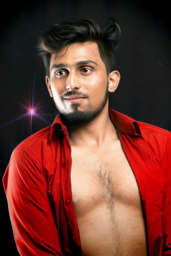

In [7]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [8]:
doc(download_images)
doc(resize_image)

download_images(dest, url_file=None, urls=None, max_pics=1000, n_workers=8, timeout=4, preserve_filename=False)
Download images listed in text file `url_file` to path `dest`, at most `max_pics`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev
resize_image(file, dest, src='.', max_size=None, n_channels=3, ext=None, img_format=None, resample=2, resume=False, **kwargs)
Resize file to dest to max_size

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [9]:
# cat classifier 
# so there would be cats and random images
from time import sleep
search = 'cat' , 'random'
path = Path('catornot')
for i in search:
  dest = path/i
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest,urls=search_images(i),max_pics=100)
  sleep(3)
  download_images(dest,urls=search_images(f'{i}s'),max_pics=100)
  sleep(3)
  resize_image(path/i, max_size=256, dest=path/i)


Searching for 'cat'
Searching for 'cats'
Searching for 'random'
Searching for 'randoms'


In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)
doc(verify_images)

verify_images(fns)
Find images in `fns` that can't be opened

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


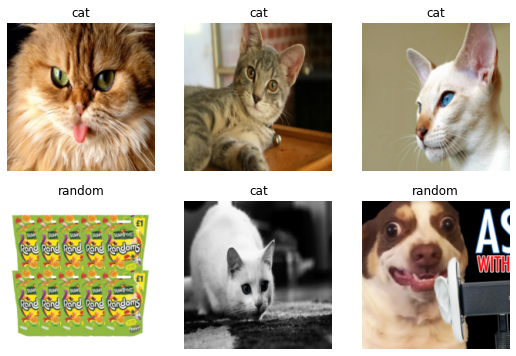

In [15]:
#making of Data Block
block = DataBlock(blocks = (ImageBlock,CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(valid_pct=0.2,seed=42),
                  get_y = parent_label,
                  item_tfms=[Resize(192,method='squish')])
catblock = block.dataloaders(path)
catblock.show_batch(max_n=6)

In [16]:
learner = cnn_learner(catblock,resnet50,metrics=accuracy)
learner.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.032953,0.202218,0.918919,00:46


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy,time
0,0.055813,0.179680,0.918919,00:56
1,0.050513,0.353233,0.945946,00:54
2,0.034432,0.299758,0.945946,00:55


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [22]:
is_cat,_,probs = learner.predict('rohith.jpeg')
print(f"this prob of this being a cat is {probs[0]}")

this prob of this being a cat is 0.0008466778672300279
